In [1]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
df = pd.read_csv("Final_nrd_Prop_compn.csv")

In [3]:
df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,M,N,P,Q,R,S,T,V,W,Y
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.018571,0.051429,0.041429,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.008571,0.025714,0.018571,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.015714,0.064286,0.051429,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.008571,0.025714,0.030000,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.008571,0.032857,0.032857,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143


In [4]:
df.shape

(2747, 152)

In [5]:
df.Class.value_counts()

Carb      1111
CGC        693
Hetero     500
DNA        280
RNA        163
Name: Class, dtype: int64

In [6]:
Hetero_df = df[(df['Class'] == 'Hetero') | (df['Class'] == 'CGC')]

In [7]:
#Carb_df

In [8]:
Hetero_df["target"] = np.where(Hetero_df["Class"].str.contains("CGC"), 1, 0)

C:\Users\Senthil\AppData\Local\Temp/ipykernel_15220/1469473897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hetero_df["target"] = np.where(Hetero_df["Class"].str.contains("CGC"), 1, 0)


In [9]:
Hetero_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,N,P,Q,R,S,T,V,W,Y,target
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.034286,0.052857,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.057143,0.128571,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.060000,0.132857,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.021429,0.018571,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.052857,0.050000,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1


In [10]:
# X -> features, y -> label
y=Hetero_df['target']
X=Hetero_df.drop(['Class','Entry','target'],axis=1)

In [11]:
print(f'X : {X.shape}')

X : (1193, 150)


In [12]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state = 230,stratify = y)

In [13]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')     

X_train: (954, 150)
y_train: (954,)
X_test: (239, 150)
y_test: (239,)


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [16]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132, 147, 162, 177, 193, 208, 223, 238, 254, 269, 284, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [47]:
rf= RandomForestClassifier(random_state=42, class_weight='balanced')

In [48]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [49]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132,
                                          147, 162, 177, 193, 208, 223, 238,
                                          254, 269, 284, 300]},
             verbose=2)

In [50]:
best_rf_params = rf_Grid.best_params_
best_rf_params

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 116}

In [51]:
rf_Model = rf_Grid.best_estimator_

In [52]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       n_estimators=116, random_state=42)

In [53]:
rf_Model.feature_importances_

array([1.05321466e-03, 4.40034239e-03, 2.66624699e-03, 7.96024806e-03,
       8.11001828e-03, 5.78169231e-03, 5.20980432e-03, 3.85907922e-03,
       3.35916963e-03, 6.89319163e-06, 1.00467180e-03, 2.34487166e-03,
       5.86730773e-03, 2.90734387e-03, 1.63816670e-04, 3.01996160e-03,
       3.19210985e-04, 2.89206670e-03, 3.13783946e-03, 2.78555652e-03,
       7.67967545e-04, 2.13653881e-03, 3.90852401e-03, 1.57861781e-03,
       2.73705673e-03, 3.36194858e-03, 3.31619828e-03, 6.52823947e-03,
       2.94775781e-03, 9.01111008e-04, 5.72216783e-03, 9.51478220e-05,
       7.81149847e-03, 9.12122397e-04, 2.96768301e-03, 9.14837360e-05,
       3.54409825e-03, 1.22228438e-03, 3.42845471e-03, 2.72593177e-03,
       1.32777601e-04, 1.16077663e-03, 2.22411097e-03, 8.91975521e-04,
       5.70529653e-03, 7.29294394e-03, 7.78332950e-03, 9.82983902e-04,
       7.91342746e-04, 1.51185059e-03, 8.28040701e-03, 4.25207717e-03,
       8.76334884e-04, 2.58207690e-03, 5.80252202e-03, 2.84930593e-03,
      

In [54]:
imp_feat=pd.DataFrame({'Feature_Name' : X.columns.tolist(), 'Feature_Importance' : rf_Model.feature_importances_})

In [55]:
imp_feat.sort_values(by = 'Feature_Importance', ascending=False, inplace = True)

In [56]:
imp_feat.head(21)

,Feature_Name,Feature_Importance
136,H,0.067093
145,S,0.047136
144,R,0.041721
143,Q,0.034027
139,L,0.031625
146,T,0.030458
133,E,0.030345
142,P,0.030340
131,D,0.027230
147,V,0.027040


In [57]:
imp_feat.to_csv('Hetero_Feature_importance.csv', index = False)

In [58]:
y_train_prediction = rf_Model.predict(X_train)
y_test_prediction = rf_Model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print ('---------Train')
print(classification_report(y_train,y_train_prediction))
print ('---------Test')
print(classification_report(y_test,y_test_prediction))

---------Train
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       400
           1       0.85      0.90      0.88       554

    accuracy                           0.85       954
   macro avg       0.85      0.85      0.85       954
weighted avg       0.85      0.85      0.85       954

---------Test
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.85      0.87      0.86       139

    accuracy                           0.84       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239



In [60]:
clf_report_train = pd.DataFrame(classification_report(y_train,y_train_prediction, output_dict=True)).transpose().reset_index()
clf_report_train['Model'] = 'Train'

clf_report_test = pd.DataFrame(classification_report(y_test,y_test_prediction, output_dict=True)).transpose().reset_index()
clf_report_test['Model'] = 'Test'

clf_report = pd.concat([clf_report_train,clf_report_test]) 
clf_report.to_csv('Hetero_Clf_Report.csv', index = False)
clf_report

,index,precision,recall,f1-score,support,Model
0,0,0.853659,0.787500,0.819246,400.000000,Train
1,1,0.854701,0.902527,0.877963,554.000000,Train
2,accuracy,0.854298,0.854298,0.854298,0.854298,Train
3,macro avg,0.854180,0.845014,0.848604,954.000000,Train
4,weighted avg,0.854264,0.854298,0.853344,954.000000,Train
0,0,0.814433,0.790000,0.802030,100.000000,Test
1,1,0.852113,0.870504,0.861210,139.000000,Test
2,accuracy,0.836820,0.836820,0.836820,0.836820,Test
3,macro avg,0.833273,0.830252,0.831620,239.000000,Test
4,weighted avg,0.836347,0.836820,0.836449,239.000000,Test


In [61]:
y_train_predpro = rf_Model.predict_proba(X_train)[:,1]
y_test_predpro = rf_Model.predict_proba(X_test)[:,1]

In [62]:
y_train_pred =rf_Model.predict(X)

In [63]:
y_train_predpro = rf_Model.predict_proba(X)[:,1]

In [64]:
Hetero_df.shape

(1193, 155)

In [65]:
Hetero_df['y_train_pred']=y_train_pred

C:\Users\Senthil\AppData\Local\Temp/ipykernel_15220/3246592019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hetero_df['y_train_pred']=y_train_pred


In [66]:
Hetero_df['y_train_predpro']=y_train_predpro

C:\Users\Senthil\AppData\Local\Temp/ipykernel_15220/3777815116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hetero_df['y_train_predpro']=y_train_predpro


In [67]:
Hetero_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,Q,R,S,T,V,W,Y,target,y_train_pred,y_train_predpro
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1,1,0.630700
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1,1,0.796808
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1,1,0.796808
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1,1,0.537822
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1,1,0.763457


C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


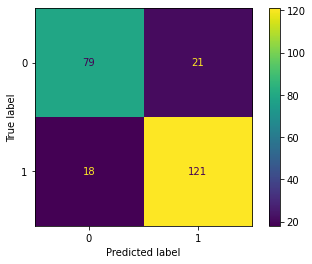

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rf_Model, X_test, y_test)

In [69]:
sensitivity = 76/(76+24)
sensitivity

0.76

In [70]:
specificity = 132/(132+7)
specificity

0.9496402877697842

In [71]:
sensitivity+specificity

1.7096402877697843

In [72]:
precision = 76/(76+7)
precision

0.9156626506024096

In [73]:
f1 = (precision * sensitivity)/(precision+sensitivity)
f1

0.4153005464480874

C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


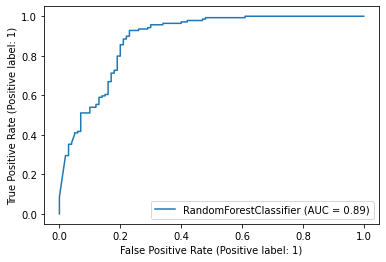

In [74]:
plot_roc_curve(rf_Model, X_test, y_test) 